In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data_gyeonggi.csv")
df.head()

,date,confirmed,death,released,weather_temp,weather_rain,social_keyword_corona,social_keyword_disinfection,social_keyword_mask,social_keyword_infection,social_keyword_briefing,date_red,traffic_subway,confirmed_foreign,group_total,PM10
0,20200301,7,0,0,5.6,0.0,288841,19264,105352,17744,3281,1,1469158,0,0,45
1,20200302,3,0,0,4.6,0.0,341923,32023,202509,17089,3581,0,4162674,0,0,41
2,20200303,2,0,0,5.1,0.0,315235,30640,203550,19368,3270,0,4168576,0,0,49
3,20200304,7,0,0,3.7,0.0,300534,32469,174302,28207,4067,0,4163524,0,0,45
4,20200305,9,0,2,2.5,0.0,278765,26606,161861,26839,3288,0,4185111,0,4,37


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x = df[['death', 'released', 'weather_temp', 'weather_rain', 'social_keyword_corona', 'social_keyword_disinfection', 'social_keyword_mask', 'social_keyword_infection', 'social_keyword_briefing', 'date_red', 'traffic_subway', 'confirmed_foreign', 'group_total', 'PM10']]
y = df[['confirmed']]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9, test_size=0.1)

In [5]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predicted = mlr.predict(x_test)

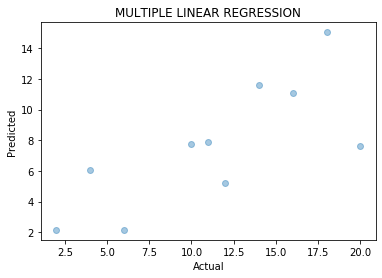

In [7]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predicted, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [8]:
print(mlr.coef_)

[[-1.52051883e+00 -4.86445327e-02 -3.69266836e-02 -6.02680032e-02
   1.74809965e-05  5.87135892e-05 -1.11021101e-05  1.15006863e-04
   1.24825481e-04  3.32831999e+00  1.02154852e-06  1.04421082e+00
   2.84021254e-01  2.85251358e-02]]


In [11]:
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))
print(mlr.score(x,y))

0.6668931437809222
0.1504883321503987
0.636329054455012
